In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [2]:
data = pd.read_csv('data.csv')
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [8]:
# dropping null values
data = data.dropna()
data.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [34]:
data['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


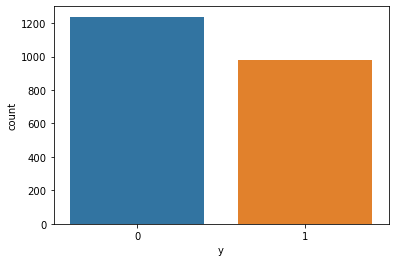

In [35]:
# Vizulalizing Class distribution
g = sns.countplot(data['y'])
g.set_xticklabels(['0','1'])
plt.show()

In [15]:
# splitting training and testing test
X = data.iloc[:,:2]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Logistic Regression

In [53]:
model1 = LogisticRegression(penalty = 'l2').fit(X_train,y_train)

In [54]:
lr_pred = model1.predict(X_test)
lr_accu_test = model1.score(X_test,y_test)
lr_f1 = f1_score(y_test,lr_pred)

print("Testing accuracy  :",lr_accu_test)
print("F1 Score :",lr_f1)
print("Logistic Regression Confusion matrix :\n\n", confusion_matrix(y_test,lr_pred))

Testing accuracy  : 0.7488738738738738
F1 Score : 0.6039076376554174
Logistic Regression Confusion matrix :

 [[495   2]
 [221 170]]


## Support Vector Machine

In [37]:
#kernal = linear
svc = svm.SVC(kernel='linear').fit(X_train,y_train)

In [38]:
svc_pred = svc.predict(X_test)
svc_accu_test = svc.score(X_test,y_test)
svc_f1 = f1_score(y_test,svc_pred)

print("Testing accuracy  :",svc_accu_test)
print("F1 Score :",svc_f1)
print("Support Vector Linear Confusion matrix :\n\n", confusion_matrix(y_test,svc_pred))

Testing accuracy  : 0.7398648648648649
F1 Score : 0.5837837837837838
Logistic Regression Confusion matrix :

 [[495   2]
 [229 162]]


In [56]:
#kernal = rbl
svcr = svm.SVC(kernel='rbf',C=1).fit(X_train,y_train)

In [57]:
svcr_pred = svcr.predict(X_test)
svcr_accu_test = svcr.score(X_test,y_test)
svcr_f1 = f1_score(y_test,svcr_pred)

print("Testing accuracy  :",svcr_accu_test)
print("F1 Score :",svcr_f1)
print("Support Vector RBL Confusion matrix :\n\n", confusion_matrix(y_test,svcr_pred))

Testing accuracy  : 0.9594594594594594
F1 Score : 0.9539641943734015
Support Vector RBL Confusion matrix :

 [[479  18]
 [ 18 373]]


## Decision Tree Classifier

In [45]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=1)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_testing = dt.score(X_test,y_test)
# dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)

print("Testing Accuracy :",dt_testing )
print("F1 Score: ",dt_f1 )
print('Decision Tree Confusion matrix :\n\n',confusion_matrix(y_test, dt_pred) )

Testing Accuracy : 0.6058558558558559
F1 Score:  0.46153846153846156
Decision Tree Confusion matrix :

 [[388 109]
 [241 150]]


## KNN Classifier

In [47]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
knn_pred = model.predict(X_test)
knn_accu_test = model.score(X_test,y_test)
knn_f1 = f1_score(y_test,knn_pred)

print("Testing accuracy  :",knn_accu_test)
print("F1 Score :",knn_f1)
print("KNN Confusion matrix :\n\n", confusion_matrix(y_test,knn_pred))

Testing accuracy  : 0.956081081081081
F1 Score : 0.9504447268106735
KNN Confusion matrix :

 [[475  22]
 [ 17 374]]


## Comparison

In [58]:
df_compare = pd.DataFrame([[lr_accu_test,lr_f1],
                           [svc_accu_test,svc_f1],
                           [svcr_accu_test,svcr_f1],
                           [dt_testing,dt_f1],
                           [knn_accu_test,knn_f1]],
    columns=['Testing Accuracy','F1 Score'],
                       index=['Logistic Regression','Support Vector Linear',
                              'Support Vector RBL','DecisionTrees',
                              'KNN'])
df_compare

,Testing Accuracy,F1 Score
Logistic Regression,0.748874,0.603908
Support Vector Linear,0.739865,0.583784
Support Vector RBL,0.959459,0.953964
DecisionTrees,0.605856,0.461538
KNN,0.956081,0.950445


### From the results of the model evaluation we can infer that KNN and Support Vector RBL models have outperformed other models with a good margin. RBF Kernel has the advantages of K-NN  and therfore its similarity to K-Nearest Neighborhood Algorithm.
### These models gave good results because the data is in a way that cannot be linearly separable. Therefore RBL kernal could give best results against the linear kernal of SVM.
